In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import sklearn.multiclass
import sklearn.preprocessing

# Maszynowe Uczenie

Powyżej wczytano najistotniejsze moduły biblioteki *scikit-learn* używanej do maszynowego uczenia w Pythonie. Całe API można znaleźć tutaj:

http://scikit-learn.org/stable/modules/classes.html

Poza tym, warto też zaglądać do:

http://scikit-learn.org/stable/user_guide.html

Na początku, wczytaj i przejrzyj bazę cyfr wczytywaną metodą *sklearn.datasets.load_digits()*:

In [5]:
dig=sklearn.datasets.load_digits()

print(dig.keys())
print(dig['DESCR'])

dict_keys(['images', 'data', 'DESCR', 'target_names', 'target'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Wczytaj bazę ponownie ustawiając argument *return_X_y* na *True*:

In [9]:
X,y = sklearn.datasets.load_digits(return_X_y=True)
print(X.shape)
print(y.shape)

print(X[0])
print(y[0])

(1797, 64)
(1797,)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
0


Narysuj kilka przykładowych obrazków z bazy:

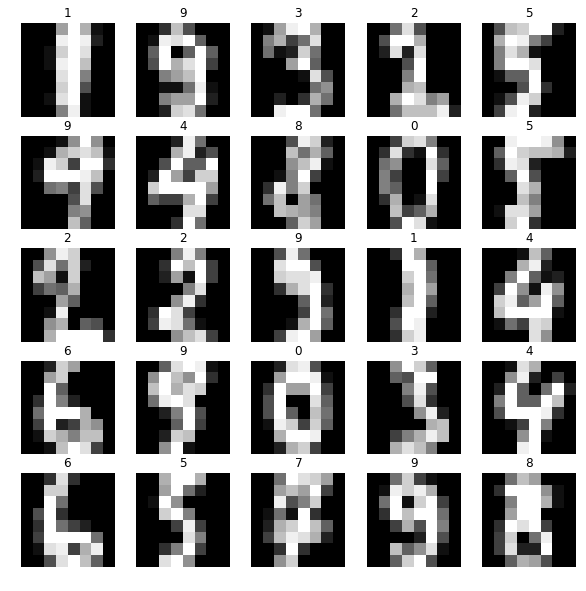

In [14]:
figure(figsize=(10,10))
for i in range(25):
    subplot(5,5,i+1)
    ind = random.randint(0,X.shape[0])
    imshow(X[ind].reshape(8,8),cmap=cm.gray)
    _=axis('off')
    _=title(y[ind])

## Podział danych na testowe i treningowe

Można to łatwo osiągnąć używając metody *sklearn.model_selection.train_test_split()*. Argument *test_size* pozwala na ustalenie procentu danych jakie mają tworzyć w dane testowe.

Podziel losowo zbiór na dane treningowe (90%) i testowe (10%) i narysuj histogram klas w danych testowych:

(1617, 64)
(180, 64)
(1617,)
(180,)


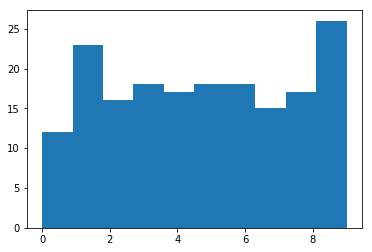

In [18]:
X_tr,X_tst,y_tr,y_tst = sklearn.model_selection.train_test_split(X,y,test_size=0.1)

print(X_tr.shape)
print(X_tst.shape)
print(y_tr.shape)
print(y_tst.shape)

_=hist(y_tst)

### Stratyfikacja

Scikit-learn ma bardzo wygodne klasy umożliwiające na stratyfikację podziału danych, czyli zapewnienie że ilość klas będzie równomierna. Użyj klasy *sklearn.model_selection.StratifiedShuffleSplit* żeby podzielić dane tak jak wyżej. Klasa ta może wygenerować kilka podziałów, ale dla naszej potrzeby wystarczy ustawić *n_splits* na 1. To co zwraca metoda *split* tej klasy jest generatorem (specjalna rodzaj Pythonowego objektu nadająca się do użycia w pętlach), ale można użyć metdoty *next* żeby wyciągnąć pierwszy (i jedyny) element tego generatora.

Wygeneruj stratyfikowany podział danych jak wyżej i wylicz histogram klas testowych:

(1617, 64)
(180, 64)
(1617,)
(180,)


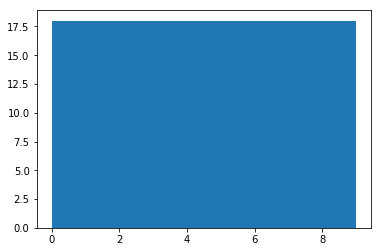

In [34]:
sss = sklearn.model_selection.StratifiedShuffleSplit(test_size=0.1,n_splits=1)

tr_ind,tst_ind = next( sss.split(X,y) )

X_tr = X[tr_ind]
y_tr = y[tr_ind]
X_tst = X[tst_ind]
y_tst = y[tst_ind]

print(X_tr.shape)
print(X_tst.shape)
print(y_tr.shape)
print(y_tst.shape)

_=hist(y_tst)

## Klasyfikacja

Użyjemy tutaj bardzo prostego modelu liniowego o nazwie "regresja logistyczna". Klasa *sklearn.linear_model.LogisticRegression* ma wiele parametrów, ale możemy je na razie zostawić domyślne.

Użyj metody *fit* podając do niej dane treningowe, a potem metodę *predict* podając dane testowe:

In [33]:
print(sklearn.__version__)

0.19.1


In [35]:
model = sklearn.linear_model.LogisticRegression()
%time model.fit( X_tr , y_tr )

h_tst = model.predict(X_tst)

print(h_tst)
print(y_tst)

CPU times: user 260 ms, sys: 4 ms, total: 264 ms
Wall time: 263 ms
[0 5 8 2 7 6 3 0 6 3 9 1 9 4 4 1 6 5 1 9 0 0 6 7 0 7 8 8 9 7 4 4 2 7 9 7 3
 3 5 6 9 7 5 2 1 9 7 9 4 8 1 1 2 3 9 1 7 9 4 6 4 8 1 0 0 1 3 5 6 5 2 4 2 2
 1 3 3 2 6 2 2 7 8 1 1 2 5 4 5 6 8 8 0 7 5 3 3 2 6 4 5 2 4 5 8 0 0 8 0 8 7
 1 4 1 6 4 1 4 0 8 6 8 5 3 6 0 2 7 2 6 0 8 3 7 5 5 9 0 5 0 6 6 4 1 9 3 7 5
 6 8 8 7 9 0 3 7 2 1 9 3 1 5 6 2 9 8 3 2 5 9 3 7 1 4 0 3 9 8 4 9]
[0 5 8 2 7 6 3 0 6 3 9 1 9 4 4 1 6 5 4 9 0 0 6 7 0 7 8 8 9 7 4 4 2 7 9 7 3
 3 5 6 9 9 5 2 1 9 7 9 4 8 1 1 2 3 9 1 7 9 4 6 4 8 1 0 0 1 3 5 6 5 2 4 2 2
 1 3 3 2 6 2 2 7 8 1 1 2 5 4 5 6 8 8 0 7 5 3 3 2 6 4 5 2 4 5 8 0 0 8 0 8 7
 1 4 1 6 4 1 4 0 8 6 8 5 3 6 0 2 7 2 6 0 8 3 7 5 5 9 0 5 0 6 6 4 1 9 3 7 5
 6 8 8 7 9 0 3 7 2 1 9 3 1 5 6 2 7 8 3 2 5 9 3 7 1 4 0 3 9 8 4 9]


### Ewaluacja

Moduł *sklearn.metrics* zawiera mnóstwo metod ewaluacji danych, ale trzeba dobrze rozumieć co one oznaczają. Niektóre z nich można policzyć tylko dla niektórych metod klasyfikacji, wiec warto pocztać dokumentację i dobrze sprawdzić wyjątki jak coś pójdzie nie tak.

Najprostszą (i z pewnością działającą dla największej liczby przypadków) miarą jest *sklearn.metrics.accuracy_score*. Policz ją dla uzyskanego wyżej wyniku.

Możesz też policzć miary typu precision/recall/F1, ale one działają tylko dla problemów binarnych. Można ją jednak zastosować dla naszego problemu rozważająć każdą klasę osobno i uśredniając wynik. Do tego należy użyć parametru *average* i podać do niego wartości *micro*, *macro* lub *weighted*.

In [36]:
acc = sklearn.metrics.accuracy_score(y_tst,h_tst)
print('Accuracy: {:0.2%}'.format(acc))

prec = sklearn.metrics.precision_score(y_tst,h_tst,average='micro')
print('Precision: {:0.2%}'.format(prec))

pec = sklearn.metrics.recall_score(y_tst,h_tst,average='micro')
print('Recall: {:0.2%}'.format(pec))

Accuracy: 98.33%
Precision: 98.33%
Recall: 98.33%


#### Macierz konfuzji

Do analizy błędów warto czasami zajrzeć do macierzy pomyłek. Wyświetl i narysuj macierz używając metody *sklearn.metrics.confusion_matrix*:

[[18  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0]
 [ 0  1  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  1]
 [ 0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  1  0 17]]


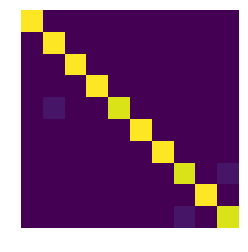

In [37]:
mat = sklearn.metrics.confusion_matrix(y_tst, h_tst)
print(mat)
imshow(mat)
_=axis('off')

## Cross validation

Dla małych zbiorów danych, bardziej przecyzyjny wynik można uzyskać używając procedury walidacji krzyżowej. W scikit-learn mamy do tego metodę *sklearn.model_selection.KFold*, albo jeszcze lepiej *sklearn.model_selection.StratifiedKFold*.

Stwórz obiekt tej klasy do wykonania walidacji 5-krzyżowej i w pętli for powtórz powyższy eksperyment zapisując miarę jakości dla każdego folda, a na końcu podaj jego średnią i odchylenie standardowe:

In [42]:
cv = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
accs = []

for tr_ind,tst_ind in cv.split(X,y) :
    X_tr = X[tr_ind]
    y_tr = y[tr_ind]
    X_tst = X[tst_ind]
    y_tst = y[tst_ind]
    model = sklearn.linear_model.LogisticRegression()
    %time model.fit( X_tr , y_tr )

    h_tst = model.predict(X_tst)
    
    acc = sklearn.metrics.accuracy_score(y_tst,h_tst)
    print('Accuracy: {:0.2%}'.format(acc))
    
    accs.append(acc)

accs = array(accs)
print('________________________________________')
print('Accuracy {:%} +/- {:%} std'.format(accs.mean(),accs.std()))

CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 250 ms
Accuracy: 96.43%
CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 248 ms
Accuracy: 94.48%
CPU times: user 232 ms, sys: 0 ns, total: 232 ms
Wall time: 231 ms
Accuracy: 96.10%
CPU times: user 232 ms, sys: 0 ns, total: 232 ms
Wall time: 231 ms
Accuracy: 96.36%
CPU times: user 236 ms, sys: 0 ns, total: 236 ms
Wall time: 235 ms
Accuracy: 96.34%
________________________________________
Accuracy 95.940112% +/- 0.740786% std


## Krzywa ROC

Krzywę tą też można wyliczyć tylko dla problemów binarnych. Dlatego musimy użyc podobnej metody "uśredniania" wyników jak w przypadku precision/recall. Dodatkowo, metoda ta jest o wiele bardziej precyzyjna jeśli wynikiem jest dokładna miara prawdopodbieństwa, zamiast binarnej klasy. Umożliwia nam ona ustalenie wartości progowej zależnej od wartości prawdopodobieństwa.

Wytrenuj ponownie model do regresji logistycznej (jak wyżej), ale tym razem użyj funkcji *decision_funcion* zamiast *predict* żeby otrzymać bardziej szczegółowy wynik klasyfikacji:

In [44]:
model = sklearn.linear_model.LogisticRegression()
model.fit( X_tr , y_tr )
h_tst = model.decision_function(X_tst)

print(h_tst.shape)
print(h_tst)
# sklearn.metrics.roc_curve(y_tst, h_tst)


(355, 10)
[[-16.17165408  -7.03575116 -15.39112402 ..., -42.5796768   -2.78579539
  -56.98346733]
 [ -6.22165897  -8.63470587 -24.99655501 ..., -22.52429933  -2.03174299
    9.40666085]
 [-37.07368818   5.0872781  -27.18642872 ..., -34.00789563  -6.54404314
  -33.27311171]
 ..., 
 [-36.61881396 -12.54452477  13.06231368 ..., -36.59125729  -8.91792556
  -44.88983724]
 [-18.00561705 -12.71674079 -38.08470947 ..., -28.04516484  -6.42407623
   -8.71129182]
 [-28.43043558 -19.25838468 -21.43846889 ...,  12.02959736 -20.49050607
  -49.0466291 ]]


Jeśli chcemy porównać ten wynik z etykietami refencji, musimy je najpierw zmienić do postaci binarnej. Można do tego użyć metody *sklearn.preprocessing.label_binarize*:

In [48]:
print(y_tst.shape)
print(y_tst)

y_tst_bin = sklearn.preprocessing.label_binarize(y_tst,classes=dig['target_names'])
print(y_tst_bin.shape)
print(y_tst_bin)

(355,)
[6 9 1 3 0 5 5 4 1 2 6 3 1 8 2 3 7 3 9 3 0 7 8 8 0 3 8 0 7 9 5 5 4 2 2 3 3
 4 6 4 5 0 7 6 4 0 3 6 2 2 4 8 7 9 7 9 0 8 9 1 1 0 6 9 6 9 2 2 7 5 9 0 3 7
 3 4 9 0 3 6 6 9 1 3 7 6 9 4 5 4 7 7 1 2 3 6 2 4 8 5 9 1 6 6 0 5 8 2 1 7 6
 2 6 7 2 5 8 9 4 0 9 5 0 4 7 1 0 2 3 3 5 1 6 2 1 6 1 8 1 3 4 4 7 9 8 4 5 0
 1 4 1 3 6 7 5 9 7 5 2 6 9 5 2 7 2 3 1 4 9 5 4 0 8 0 4 7 2 8 6 8 4 5 1 2 1
 6 3 6 2 3 1 5 5 9 4 8 8 5 8 1 9 0 1 3 8 0 5 0 9 7 3 6 5 3 6 2 8 7 4 2 6 8
 1 4 7 4 9 5 8 9 1 5 0 0 2 8 2 4 1 0 8 2 7 4 1 0 3 9 5 8 5 7 0 8 4 5 8 8 9
 0 9 6 5 2 3 3 6 6 2 6 1 7 8 1 8 4 0 6 8 9 6 4 7 5 2 3 4 5 0 9 1 9 1 2 7 9
 8 0 5 9 0 3 5 0 9 1 7 0 0 2 7 1 7 6 0 1 6 7 4 3 7 6 8 3 1 7 9 4 4 9 8 3 5
 7 1 2 3 8 0 5 2 3 4 6 9 6 3 4 4 3 1 2 2 5 7]
(355, 10)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]


W tej chwili można wyliczyć krzywę ROC dla dowolnej klasy używając metodę *sklearn.metrics.roc_curve* i podając do niej wyniki dla wybranej klasy. Metoda ta zwraca trzy wartości, z których nas interesują tylko pierwsze dwie. Wartości te można podać zarówno do metody *plot*, jak i do metody *sklearn.metrics.auc* żeby wyliczyć miarę AUC danej krzywej. Narsyuj też na wykresie krzywą od (0,0) do (1,1) reprezentującą odcięcie klasyfikacji losowej:

Text(0,0.5,'True positive rate')

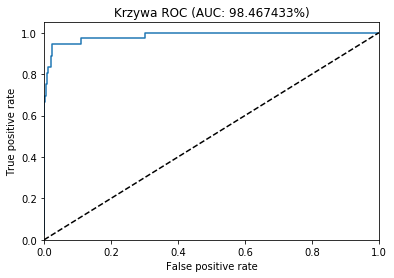

In [60]:
c = 9 #classa
fpr, tpr, _ = sklearn.metrics.roc_curve(y_tst_bin[:,c], h_tst[:,c])
auc = sklearn.metrics.auc(fpr, tpr)

plot(fpr , tpr)
plot([0,1] , [0,1], 'k--')
xlim(0,1)
ylim(0,1.05)
title('Krzywa ROC (AUC: {:%})'.format(auc))
xlabel('False positive rate')
ylabel('True positive rate')

Można też narysować uśredniony wykres dla wszystkich klas (tzw. metodą "micro") używając funkcji *ravel()* dla macierzy wyniku i referencji.

Więcej informacji znajdziesz na stronie: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Text(0,0.5,'True positive rate')

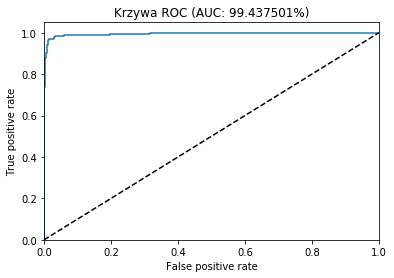

In [61]:
c = 9 #classa
# fpr, tpr, _ = sklearn.metrics.roc_curve(y_tst_bin[:,c], h_tst[:,c])
fpr, tpr, _ = sklearn.metrics.roc_curve(y_tst_bin.ravel(), h_tst.ravel())
auc = sklearn.metrics.auc(fpr, tpr)

plot(fpr , tpr)
plot([0,1] , [0,1], 'k--')
xlim(0,1)
ylim(0,1.05)
title('Krzywa ROC (AUC: {:%})'.format(auc))
xlabel('False positive rate')
ylabel('True positive rate')

# Praca domowa

Wybierz kilka (minimum 3!) różnych klasyfikatorów do problemów typu *multi-class* z tej strony: http://scikit-learn.org/stable/modules/multiclass.html - najlepiej spróbować zarówno *One-vs-all* jak i *One-vs-one* żeby zobaczyć który jest lepszy.

Wylicz i porównaj ich zarówno pod względem *accuracy* wyliczonego z walidacji krzyżowej jak i krzywych ROC. Wyniki podaj zarówno w postaci listy średnych i odchylenia *accuracy* oraz AUC, jak i w postaci wykresów: liniowych dla krzywych ROC (wszystkie klasyfikatory na jednym wykresie!) oraz *boxplot* dla miar *accuracy* (też wszystkie na jednym).

## Alternatywna praca domowa

Wylicz wynik klasyfikacji na innym zbiorze obrazów. Może to być oryginalny MNIST, CIFAR-10 lub coś innego podobnie złożonego.

In [62]:
from sklearn.svm import SVC

In [64]:
clf = SVC()
%time clf.fit( X_tr , y_tr )


CPU times: user 548 ms, sys: 0 ns, total: 548 ms
Wall time: 509 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:

h_tst = clf.predict(X_tst)

print(h_tst)
print(y_tst)
acc = sklearn.metrics.accuracy_score(y_tst,h_tst)
print('Accuracy: {:0.2%}'.format(acc))

[6 5 1 3 5 5 5 4 5 5 6 3 1 5 5 3 5 3 5 3 5 7 5 5 0 5 8 5 7 9 5 5 5 2 5 3 3
 5 6 4 5 0 5 6 4 0 5 6 5 5 4 5 7 5 5 9 5 5 5 1 5 0 6 9 6 5 2 2 5 5 9 0 5 7
 5 4 9 0 3 6 5 9 5 3 5 5 9 4 5 5 7 5 1 5 3 6 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5
 5 6 7 5 5 8 5 4 0 9 5 0 5 5 5 5 5 3 3 5 5 6 5 5 5 5 5 5 3 5 5 5 9 8 5 5 5
 5 4 1 3 6 7 5 9 5 5 2 5 5 5 2 7 5 3 1 5 9 5 5 5 5 0 4 5 2 5 6 8 5 5 1 2 1
 6 3 6 2 3 1 5 5 5 5 8 8 5 5 5 5 5 1 3 5 0 5 0 5 5 3 6 5 5 5 2 5 5 4 2 6 5
 1 4 7 5 9 5 5 9 1 5 5 5 5 5 2 4 1 5 5 5 7 4 1 5 3 9 5 5 5 5 5 5 4 5 8 5 9
 0 5 6 5 5 3 3 6 6 5 5 5 5 5 1 5 4 5 6 5 9 6 4 5 5 2 3 4 5 5 9 1 9 1 2 7 5
 5 0 5 5 0 3 5 0 5 1 5 5 5 2 5 5 5 5 0 1 6 5 5 3 5 5 5 3 1 7 5 5 4 5 5 5 5
 5 5 5 3 5 0 5 5 5 5 5 9 6 5 5 4 3 1 2 2 5 5]
[6 9 1 3 0 5 5 4 1 2 6 3 1 8 2 3 7 3 9 3 0 7 8 8 0 3 8 0 7 9 5 5 4 2 2 3 3
 4 6 4 5 0 7 6 4 0 3 6 2 2 4 8 7 9 7 9 0 8 9 1 1 0 6 9 6 9 2 2 7 5 9 0 3 7
 3 4 9 0 3 6 6 9 1 3 7 6 9 4 5 4 7 7 1 2 3 6 2 4 8 5 9 1 6 6 0 5 8 2 1 7 6
 2 6 7 2 5 8 9 4 0 9 5 0 4 7 1 0 2 3 3 5 1 6 2 1 6 1 8

In [69]:
from sklearn import linear_model

In [72]:
clf = linear_model.SGDClassifier()
%time clf.fit( X_tr , y_tr )

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 14.9 ms


/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [73]:
h_tst = clf.predict(X_tst)

print(h_tst)
print(y_tst)
acc = sklearn.metrics.accuracy_score(y_tst,h_tst)
print('Accuracy: {:0.2%}'.format(acc))

[6 9 1 3 0 5 5 4 1 2 6 3 1 8 1 3 7 3 9 3 1 7 8 1 0 3 8 0 7 9 5 5 4 2 1 3 3
 1 6 8 5 0 7 6 1 0 3 6 2 2 1 8 7 9 7 9 0 8 9 1 1 0 6 9 6 9 2 2 7 5 9 0 3 7
 2 4 9 0 3 6 6 9 1 3 7 6 9 1 5 1 9 7 1 1 9 6 2 4 8 5 9 1 6 6 0 5 8 2 1 7 6
 2 6 7 2 5 1 9 4 0 9 5 0 1 7 1 0 2 3 3 5 1 6 2 1 6 1 8 1 3 4 9 7 9 8 4 5 0
 1 4 1 3 6 7 5 9 7 5 2 6 9 5 2 7 2 3 1 4 9 5 4 0 1 0 4 7 2 8 6 8 4 9 1 2 1
 6 3 6 2 3 1 5 5 9 4 8 8 5 8 1 9 0 1 3 8 0 5 0 9 7 3 6 5 3 6 2 8 7 4 2 6 8
 1 4 7 4 9 5 8 9 1 5 0 0 2 8 2 4 1 5 8 2 7 4 1 1 3 9 5 8 2 7 5 1 4 5 8 8 9
 0 9 6 5 2 3 9 6 6 2 6 1 7 8 1 8 4 0 6 8 9 6 4 7 5 2 3 4 5 0 9 1 9 1 2 7 9
 8 0 5 9 0 3 5 0 8 1 7 1 0 2 1 1 7 6 0 1 6 7 1 3 7 6 8 3 1 7 1 9 4 1 8 8 5
 7 1 2 1 8 0 5 2 8 4 6 9 6 3 4 4 3 1 2 2 5 7]
[6 9 1 3 0 5 5 4 1 2 6 3 1 8 2 3 7 3 9 3 0 7 8 8 0 3 8 0 7 9 5 5 4 2 2 3 3
 4 6 4 5 0 7 6 4 0 3 6 2 2 4 8 7 9 7 9 0 8 9 1 1 0 6 9 6 9 2 2 7 5 9 0 3 7
 3 4 9 0 3 6 6 9 1 3 7 6 9 4 5 4 7 7 1 2 3 6 2 4 8 5 9 1 6 6 0 5 8 2 1 7 6
 2 6 7 2 5 8 9 4 0 9 5 0 4 7 1 0 2 3 3 5 1 6 2 1 6 1 8

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
clf = KNeighborsClassifier()
%time clf.fit( X_tr , y_tr )

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 21.6 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
h_tst = clf.predict(X_tst)

print(h_tst)
print(y_tst)
acc = sklearn.metrics.accuracy_score(y_tst,h_tst)
print('Accuracy: {:0.2%}'.format(acc))

[6 9 1 3 0 5 5 4 1 2 6 3 1 8 2 3 7 3 9 3 0 7 8 8 0 3 8 0 7 9 5 5 4 2 2 3 3
 4 6 4 5 0 7 6 4 0 3 6 2 2 4 8 7 9 7 9 0 8 9 1 1 0 6 9 6 9 2 2 7 5 9 0 3 7
 3 4 9 0 3 6 6 9 1 3 7 6 9 4 5 4 7 7 1 2 3 6 2 4 8 5 9 1 6 6 0 5 8 2 1 7 6
 2 6 7 2 5 8 9 4 0 9 5 0 4 7 1 0 2 3 3 5 1 6 2 1 6 1 8 1 3 4 4 7 9 8 4 5 0
 1 4 1 3 6 7 5 9 7 5 2 6 9 5 2 7 2 3 1 4 9 5 4 0 8 0 4 7 2 8 6 8 4 5 1 2 1
 6 3 6 2 3 1 5 5 9 4 8 8 5 8 1 9 0 1 3 8 0 5 0 9 7 3 6 5 3 6 2 8 7 4 2 6 8
 1 4 7 4 9 5 8 9 1 5 0 0 2 8 2 4 1 0 8 2 7 4 1 0 3 9 5 8 5 7 0 8 4 5 8 8 9
 0 9 6 5 2 3 3 6 6 2 6 1 7 8 1 8 4 0 6 8 9 6 4 7 5 2 3 4 5 0 9 1 9 1 2 7 9
 8 0 5 9 0 3 5 0 9 1 7 0 0 2 7 1 7 6 0 1 6 7 4 3 7 6 8 3 1 7 3 7 4 5 8 3 5
 7 1 2 3 8 0 5 2 3 4 6 9 6 3 4 4 3 1 2 2 5 7]
[6 9 1 3 0 5 5 4 1 2 6 3 1 8 2 3 7 3 9 3 0 7 8 8 0 3 8 0 7 9 5 5 4 2 2 3 3
 4 6 4 5 0 7 6 4 0 3 6 2 2 4 8 7 9 7 9 0 8 9 1 1 0 6 9 6 9 2 2 7 5 9 0 3 7
 3 4 9 0 3 6 6 9 1 3 7 6 9 4 5 4 7 7 1 2 3 6 2 4 8 5 9 1 6 6 0 5 8 2 1 7 6
 2 6 7 2 5 8 9 4 0 9 5 0 4 7 1 0 2 3 3 5 1 6 2 1 6 1 8